In [ ]:
!wget https://github.com/luisgasco/ntic_master_datos/raw/main/datasets/tripadvisor_reviews.tsv
# Se lee con el comando dataset =pd.read_csv("tripadvisor_reviews.tsv", sep="\t")
# Recordar descargar los modelos de spacy y nltk necesarios para la resolución del ejercicio


--2021-07-20 17:40:25--  https://github.com/luisgasco/ntic_master_datos/raw/main/datasets/tripadvisor_reviews.tsv
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/luisgasco/ntic_master_datos/main/datasets/tripadvisor_reviews.tsv [following]
--2021-07-20 17:40:26--  https://raw.githubusercontent.com/luisgasco/ntic_master_datos/main/datasets/tripadvisor_reviews.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14925041 (14M) [text/plain]
Saving to: ‘tripadvisor_reviews.tsv.1’

tripadvisor_reviews 100%[===================>]  14.23M  63.8MB/s    in 0.2s    

2021-07-20 17:40:26 (63.8 MB/s) - ‘tripa

# Ejercicio 1 (35%)

El objetivo de este ejercicio es comprobar los conocimientos adquiridos por el alumno en temas relacionados a las posibilidades de visualización de datos textuales y el proceso de preparación de los textos.

Para ello, teniendo en cuenta el conjunto de datos textuales del corpus, se solicita lo siguiente:

- **Apartado 1**: Información básica sobre el dataset: Número de documentos, número de documentos duplicados, número de elementos en cada clase. (10%)

- **Apartado 2**: Diseñar funciones para la limpieza de los textos:
    - Quitar palabras vacías. (10%)
    - Quitar símbolos de puntuación. (10%)
    - Lematización con Spacy. (10%)
    - Tokenización con NLTK. (10%)

- **Apartado 3**: Calcular y representar gráficamente en forma de distribución, como se vió en clase, las longitudes en caracteres y en tokens (despues del proceso de limpieza) de los documentos del corpus. (25%)

- **Apartado 4**: Cálcular y representar gráficamente en forma de histograma los 10 tokens más utilizados en cada una de las clases del corpus despues del proceso de limpieza (25%)


> Nota: Como se dijo en clase, para la obtención de la máxima calificación en los ejercicios es necesario que el código esté apropiadamente comentado indicando el proceso llevado a cabo por el alumno. Además, en el caso de las visualizaciones, deben incorporar **todos** los elementos necesarios para su correcta comprensión (leyenda, rotación de etiquetas si es necesario, etc). 

# Apartado 1
## Información básica sobre el dataset: Número de documentos, número de documentos duplicados, número de elementos en cada clase.

En primer lugar cargamos la librería pandas 

In [ ]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.autonotebook import tqdm
tqdm.pandas()

/usr/local/lib/python3.7/dist-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [ ]:
!pip install spacy
!python -m spacy download es_core_news_sm
# Instalamos nltk
!pip install nltk

     |████████████████████████████████| 16.2 MB 1.3 MB/s 
  Created wheel for es-core-news-sm: filename=es_core_news_sm-2.2.5-py3-none-any.whl size=16172932 sha256=20be2f44c0531558f6d7b8e178fa7176fd412928c35cdc4780fdbec8c3d3eef5
  Stored in directory: /tmp/pip-ephem-wheel-cache-hp8tiw_p/wheels/21/8d/a9/6c1a2809c55dd22cd9644ae503a52ba6206b04aa57ba83a3d8
Successfully built es-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_sm')


In [ ]:
dataset = pd.read_csv("tripadvisor_reviews.tsv", sep = "\t")

In [ ]:
dataset.head()

,Review,positive
0,nice hotel expensive parking got good deal sta...,1
1,ok nothing special charge diamond member hilto...,0
2,nice rooms not 4* experience hotel monaco seat...,0
3,"unique, great stay, wonderful time hotel monac...",1
4,"great stay great stay, went seahawk game aweso...",1


Vamos con la recogida de información previa que se nos pide

In [ ]:
print("Tenemos un conjunto de {} documentos".format(dataset.shape[0]))
print("El dataframe tiene {} columnas".format(dataset.shape[1]))
print("Tenemos un conjunto de {} duplicados".format(np.sum(dataset.duplicated(subset=["Review"]))))

Tenemos un conjunto de 20491 documentos
El dataframe tiene 2 columnas
Tenemos un conjunto de 0 duplicados


Echamos un vistazo a los NAs que puedan haber en el dataset

In [ ]:
print("Hay {} valores vacíos en las reviews y {} valores vacíos en la columna positiva".format(np.sum(dataset.isnull())[0], np.sum(dataset.isnull())[1]))

Hay 0 valores vacíos en las reviews y 0 valores vacíos en la columna positiva


Revisemos como es la distribución de clases 0,1

In [ ]:
dataset.positive.value_counts()

1    15093
0     5398
Name: positive, dtype: int64

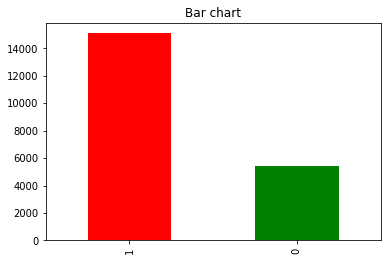

In [ ]:
ax, fig = plt.subplots()
etiquetas = dataset.positive.value_counts()
etiquetas.plot(kind= 'bar', color= ["red", "green"])
plt.title('Bar chart')
plt.show()

Es evidente que tenemos un problema de clasificación binaria, dado que la valoración positiva se da en la gran mayoría de casos (reviews) y en cambio hay muy pocos casos donde sea mala

#Apartado 2
## Diseñar funciones para la limpieza de los textos:

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
import string
import es_core_news_sm

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stop

### 2.1 Quitar palabras vacías

In [ ]:
def quit_empty_words(text):
  text_tokens = word_tokenize(text)
  text_tokenized = [word for word in text_tokens if not word in stopwords.words('english')]
  return " ".join(text_tokenized)

In [ ]:
dataset['text_processed']= dataset["Review"].progress_apply(lambda x: quit_empty_words(x))

In [ ]:
dataset['text_processed']

0        nice hotel expensive parking got good deal sta...
1        ok nothing special charge diamond member hilto...
2        nice rooms 4* experience hotel monaco seattle ...
3        unique , great stay , wonderful time hotel mon...
4        great stay great stay , went seahawk game awes...
                               ...                        
20486    best kept secret 3rd time staying charm , 5-st...
20487    great location price view hotel great quick pl...
20488    ok looks nice modern outside , desk staff n't ...
20489    hotel theft ruined vacation hotel opened sept ...
20490    people talking , ca n't believe excellent rati...
Name: text_processed, Length: 20491, dtype: object

### 2.2 Quitar símbolos de puntuación.


In [ ]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [ ]:
dataset['text_processed']= dataset["text_processed"].apply(remove_punctuations)

### 2.3 Lematización con Spacy

In [ ]:
nlp = es_core_news_sm.load(disable=['parser', 'ner'])
def lematizar(words):
    mytokens = nlp(words)
    # Lematizamos los tokens y los convertimos  a minusculas
    mytokens = [ word.lemma_ if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    # Extraemos el text en una string
    return " ".join(mytokens)

In [ ]:
dataset['text_processed']= dataset["text_processed"].progress_apply(lambda x: lematizar(x))

### 2.4 Tokenización con NLTK

In [ ]:
def tokenize_text(words):
  sentence = word_tokenize(words)
  return sentence


In [ ]:
dataset['text_processed']= dataset["text_processed"].progress_apply(lambda x: tokenize_text(x))

In [ ]:
dataset['text_processed']

0        [nice, hotel, expensive, parking, got, good, d...
1        [ok, nothing, special, charge, diamond, member...
2        [nice, rooms, 4, experience, hotel, monaco, se...
3        [unique, great, stay, wonderful, timar, hotel,...
4        [great, stay, great, stay, went, seahawk, game...
                               ...                        
20486    [best, kept, secret, 3rd, timar, staying, char...
20487    [great, location, price, view, hotel, great, q...
20488    [ok, look, nice, modern, outside, desk, staff,...
20489    [hotel, theft, ruined, vacation, hotel, opened...
20490    [people, talking, ca, nt, believe, excellent, ...
Name: text_processed, Length: 20491, dtype: object

#Apartado 3
## Calcular y representar gráficamente en forma de distribución, como se vio en clase, las longitudes en caracteres y en tokens (después del proceso de limpieza) de los documentos del corpus

Necesitamos iterar a través de todas las palabras en todos los documentos y almacenar las identificaciones del documento para cada palabra

In [ ]:
DF = {}
for i in range(len(dataset["text_processed"])):
    tokens = dataset["text_processed"][i]
    for w in tokens:
        try:
            DF[w].add(i)
        except:
            DF[w] = {i}

DF tendrá la palabra como clave y la lista de identificaciones de documentos como valor

In [ ]:
for i in DF:
  DF[i]= len(DF[i])
DF

{'nice': 7415,
 'hotel': 16319,
 'expensive': 1671,
 'parking': 1112,
 'got': 4162,
 'good': 9277,
 'deal': 1263,
 'stay': 10094,
 'anniversary': 339,
 'arrived': 2385,
 'latir': 1375,
 'evening': 1541,
 'took': 2293,
 'advice': 474,
 'previous': 668,
 'reviews': 3085,
 'valet': 401,
 'check': 2218,
 'quick': 795,
 'easy': 1888,
 'little': 4403,
 'disappointed': 1117,
 'nonexistent': 62,
 'view': 3417,
 'room': 14049,
 'clean': 7648,
 'size': 1743,
 'bed': 3775,
 'comfortable': 3833,
 'woke': 128,
 'stiff': 27,
 'neck': 30,
 'high': 1495,
 'pillows': 569,
 'soundproof': 46,
 'like': 5327,
 'heard': 728,
 'music': 710,
 'night': 6328,
 'morning': 2584,
 'loud': 526,
 'bangs': 4,
 'doors': 583,
 'opening': 168,
 'closing': 101,
 'hear': 884,
 'people': 4123,
 'talking': 279,
 'hallway': 200,
 'maybe': 776,
 'noisy': 897,
 'neighbors': 71,
 'aveda': 72,
 'bath': 1001,
 'products': 196,
 'goldfish': 14,
 'touch': 623,
 'taken': 715,
 'advantage': 306,
 'staying': 2157,
 'longer': 406,
 'lo

In [ ]:
dataset["char_len"] = dataset["text_processed"].apply(lambda x: len(x))

In [ ]:
dataset["clean_text"] = dataset["text_processed"].progress_apply(lambda x: " ".join(x))

In [ ]:
from google.colab import files
files.download('data_preprocessed.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
with open("data_preprocessed.csv", "w") as text_file:
    text_file.write(dataset.to_csv(index=False))

Conozcamos de que va el dataset, es decir, cuales son los tokens mas empleados.

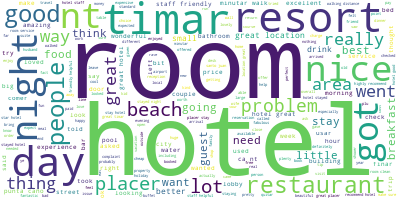

In [ ]:
from wordcloud import WordCloud
# Une las frases
long_string = ','.join(dataset["clean_text"].values)
# Genera un objecto WordCloud 
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=0, contour_color='steelblue')
# Genera el wordcloud
wordcloud.generate(long_string)
# Visualizalo en una imagen
wordcloud.to_image()

Otra manera de ver como es la distribución es mediante el plot simple que permite observar como es esa diferencia de frecuencias con el resto de tokens

In [ ]:
from nltk.probability import FreqDist
fdist = FreqDist(DF)
print(fdist)

<FreqDist with 80728 samples and 1667177 outcomes>


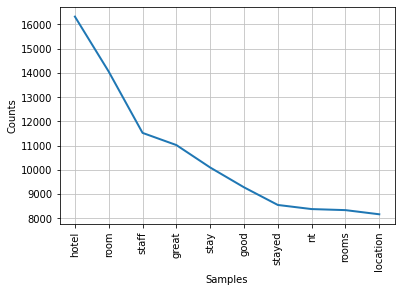

In [ ]:
# Frequency Distribution Plot
fdist.plot(10,cumulative=False)
plt.show()

Podemos comporbar que nivel de token las palabras más utilizadas son 'hotel', 'room', que se diferencian del resto en gran medida

Para el caso de las longitudes de los tokens, vemos una distribución donde se concentra en su mayoria entre 0-250 caracteres por cada una de las frases

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


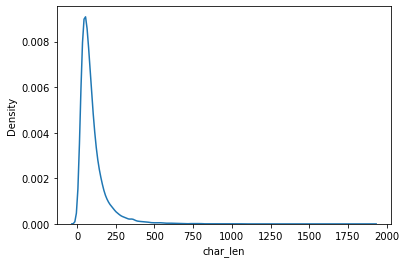

In [ ]:
sns.distplot(dataset["char_len"], hist=False, label="real")

# Apartado 4
## Calcular y representar gráficamente en forma de histograma los 10 tokens más utilizados en cada una de las clases del corpus después del proceso de limpieza

Dividimos el dataset en dos, segun la clase del corpus para posteriormente analizar por separado los tokens mas utilizados

In [ ]:
pos_reviews = dataset.loc[dataset['positive'] == 1]
neg_reviews = dataset.loc[dataset['positive'] == 0]

El cálculo se hará a traves de la funcion counter, teniendo en cuenta solo los 10 tokens mas utilizados

In [ ]:
from collections import Counter
top_10_tokens_pos= Counter(" ".join(pos_reviews["clean_text"]).split()).most_common(10)
top_10_tokens_neg= Counter(" ".join(neg_reviews["clean_text"]).split()).most_common(10)

In [ ]:
pos_result = pd.DataFrame(top_10_tokens_pos,
                    columns=['Word', 'Frequency']).set_index('Word')
neg_result = pd.DataFrame(top_10_tokens_neg,
                    columns=['Word', 'Frequency']).set_index('Word')

Text(0.5, 1.0, 'Amount Frequency tokens Negative')

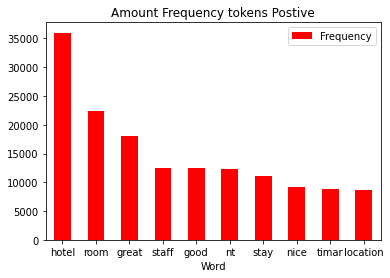

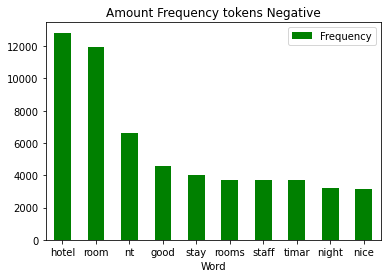

In [ ]:
ax_1= pos_result.plot.bar(rot=0, color='red')
ax_1.set_title("Amount Frequency tokens Postive")
ax_2 = neg_result.plot.bar(rot=0, color='green')
ax_2.set_title("Amount Frequency tokens Negative")

Ambas clases comparten las dos mayores token más utilizados en general dentro de nuestro corpus. Evidentemente al haber mas clases de tipo 1, la frecuencia es mayor y refleja con más precisión las palabras mas empleadas